In [14]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/santander-customer-satisfaction/sample_submission.csv
/kaggle/input/santander-customer-satisfaction/train.csv
/kaggle/input/santander-customer-satisfaction/test.csv


# Complexidade de Modelos - Viés e Variância
 
## Observações abaixo - função polinomial de 1 grau com ruido

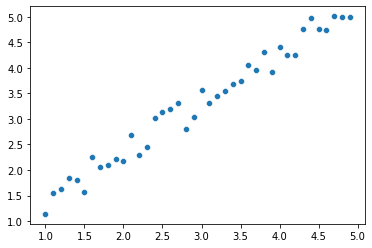

In [15]:
import warnings
warnings.filterwarnings("ignore")

import plotly.express as px
import seaborn as sns
from scipy import interpolate
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeRegressor


x_reta = np.arange(1, 5, 0.1)
ruido = (np.random.rand(len(x_reta))) / 1.5
y_reta = x_reta + ruido

sns.scatterplot( x = x_reta, y = y_reta);

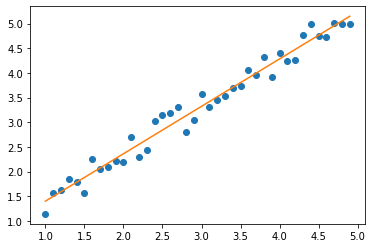

In [16]:
polinomial_fitted_reta = np.polynomial.polynomial.Polynomial.fit(x_reta, y_reta, 1)

plt.plot(x_reta, y_reta, 'o', x_reta, polinomial_fitted_reta(x_reta), '-')
plt.show()

O modelo acima é o que melhor descreve o comportamento dos dados, pois consegue captar a função que gera as observação, ao qual é somada um pouco de ruido.

Observação:

1) Mesmo obtendo a função de fundo que gerou os dados, existe um ruido aleatorio junto ao valor de cada observação.
        
2) Não é possivel prever o ruido aleatório que corresponde com cada nova observação gerada.

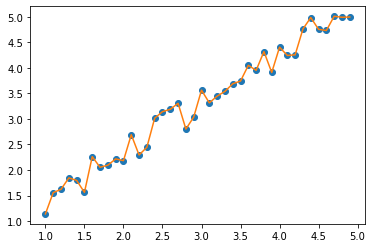

In [17]:
f = interpolate.interp1d(x_reta, y_reta)

xnew = np.arange(x_reta.min(), x_reta.max(), 0.1)
ynew = f(xnew)   # use interpolation function returned by `interp1d`
plt.plot(x_reta, y_reta, 'o', xnew, ynew, '-')
plt.show()

O modelo acima tem Erro = 0 nos dados de treino, pois passa exatamente em cima de cada um dos pontos - porem é bastante intuitivo perceber que esse modelo é complexo demais e não deve apresentar uma boa generalização para prever valores de novos dados.

O modelo se adapta completamente ao ruido presente nas observações, ficando excessivamente complexo e diminuindo sua capacidade de generalização para novas observações.

Esse modelo coloca a noção de 2 questões importantes:

- A complexificação dos modelos permite zerar o erro nos dados de treino, porem isso não necessariamente representa capacidade de generalização dessa medida de erro.

- A necessidade de utilizar outro conjunto de dados, separado dos dados de treinamento, para estimar mais fielmente o erro de generalização do modelo.

## Dados abaixo - função polinomial de 3 grau com ruido

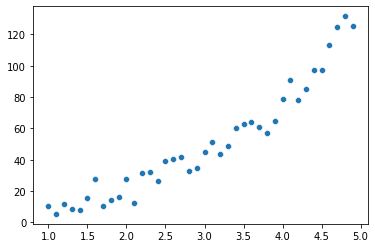

In [18]:
x = np.arange(1, 5, 0.1)
ruido = (np.random.rand(len(x)) * 25)
y = x * x * x + ruido

sns.scatterplot( x = x, y = y);

### Ao utilizar uma regressão linear

- Os dados são gerados por uma função mais complexa do que a estimada pelo modelo, fazendo com que a estimativa esteja na média bastante errada. Dizemos que esse modelo tem alto viés dado que as estimativas de valores são, em média, relativamente distantes dos valores reais.

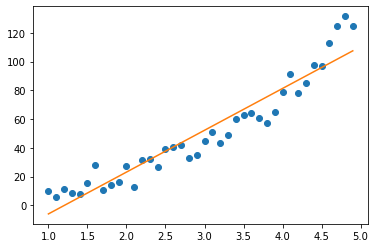

In [19]:
polinomial_fitted = np.polynomial.polynomial.Polynomial.fit(x, y, 1)

plt.plot(x, y, 'o', x, polinomial_fitted(x), '-')
plt.show()

- Tanto esse modelo abaixo (de uma função cubica para dados gerados por uma função cubica) quanto o primeiro modelo apresentado (uma regressão linear para dados gerados linearmente) apresentam modelos que consideramos ter baixo viés, dado que as estimativas dos modelos estão bastante próximas dos valores reais observados.

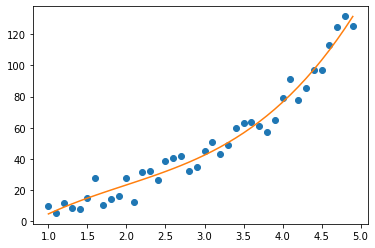

In [20]:
polinomial_fitted = np.polynomial.polynomial.Polynomial.fit(x, y, 3)

plt.plot(x, y, 'o', x, polinomial_fitted(x), '-')
plt.show()

 - Já esse modelo abaixo, assim como o modelo da primeira situação com Erro = 0, são gerados por polinomios de grau muito alto, que são muito instaveis nas suas estimativas, mesmo quando ocorrem pequenissimas alterações nos valores de entrada - modelando mesmo o erro aleatório de cada observação nas suas estimativas. 

- Ao serem tão instaveis e variarem enormemente mesmo com pequenas alterações nos dados de treino, dizemos nesse problema que são modelos com alta variância.

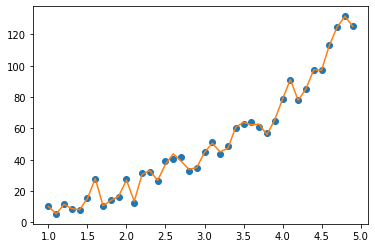

In [21]:
polinomial_fitted = np.polynomial.polynomial.Polynomial.fit(x, y, len(x))

plt.plot(x, y, 'o', x, polinomial_fitted(x), '-')
plt.show()

# Apresentação mais intuitiva de Viés e Variância

### Todo erro de modelos supervisionados pode ser decomposto em três partes:

                                Erro do Modelo = Viés + Variância + Erro Irredutivel
                                
Intuitivamente, o Erro Irredutivel é aquele sobre o que não é possivel intervir e constitui o erro minimo que qualquer modelo consegue obter nessa tarefa.

A parte do erro por Viés esta associada ao erro do modelo em conseguir captar relações entre as variaveis de entrada e a target - como por utilizar relações simplificadas demais (como relações lineares em cenários não-lineares) ou devido a baixo poder explicativo das variaveis de entrada para estimar a target.

A parte do erro por Variância esta associado ao erro do modelo cometido pela não capacidade de generalização nas relações aprendidas - como por modelos que se adequam perfeitamente ao ruido ou em particularidades presente nos dados de treino.

### Conceitos melhor formalizados:

Sendo:

- x0 uma observação qualquer

- f a função que nosso modelo retorna ao estimar uma observação

- w a função original que gerou os dados observados 

- E[x] o valor médio de x                                        

                                            Viés = E[f(x0)] − w(x0)


Ou seja, o viés corresponde ao valor em média que nossa predição difere do valor verdadeiro de target.                                        

                                     Variância = E[ f(x0) − E[f(x0)] ]²
                                    
                                    
Ou seja, a variância corresponde ao desvio quadrático médio de quanto as predições do modelo diferem de sua predição média.


O Erro Irredutivel: é o menor erro possivel de ser alcançado para qualquer modelo, dado a aleatoriedade não explicavel que compoe os resultados das observações. Tambem é chamado de Erro Bayesiano (ou Bayes Error Rate)

- Observação: Enquanto o viés é calculado levando em conta o valor real da observação e o valor estimado, a variãncia leva apenas em consideração os valores estimados gerados pelo próprio modelo

#### Perspectiva mais estatística:

- Viés e Variância são o primeiro e segundo momento (média e variância) obtidos de uma distribuição de probabilidade, gerada pelos resultados de seu modelo.

- Assim como para distribuições de probabilidade em geral, o primeiro e segundo momento podem estar relacionados (como no caso de uma Distribuição Normal) mas não necessariamente sempre estão - podendo gerar diferentes situações como, alto viés e alta variancia, alto viés e baixa variância, baixo viés e baixa variância, baixo viés e alta variância - porem, geralmente nos modelos de classificações/regressões existe uma relação em que ações voltadas para a diminuição do viés aumentam a variância e vice-versa.

- Destaque no geralmente, pois é bastante simples construir exemplo em que alterações reduzam tanto o viés quanto a variância original do modelo, ao mesmo tempo.

# Overfitting e Underfitting
    
## Overfitting - Problema de variância

- Overfitting se refere a um modelo que se adaptou excessivamente ao conjunto de treinamento, não tendo capacidade de generalização da performance.

- Acontece quando um modelo aprende as particularidades e ruidos dos dados de treinamento, que não se extendem para novos dados e assim tem sua performance impactada.

- Geralmente ocorre quando existem relativamente poucas observações, quando um numero muito grande de variaveis é utilizado em alguns modelos e/ou com o uso de modelos excessivamente complexos para o problema.

## Underfitting - Problema de viés

- Underfitting se refere a um modelo que não consegue se adaptar bem nem ao conjunto de treinamento, tendo alto erro mesmo nesses dados.

- Acontece quando o modelo não teve a capacidade construir boas relações entre as variaveis e a target, sendo um modelo excessivamente simples para representar a situação.

- Geralmente ocorre quando utilizamos modelos com pressupostos que não são validos no problema modelado ou quando temos variaveis muito pouco relacionadas com a target.

# Regularização


São técnicas voltadas para penalizar a construção de modelos complexos, de maneira a obter modelos mais simples  e reduzir overfitting.

Cada tipo de modelo costuma ter métodos especificos para sua regularização, que adicionam restrições para a construção do modelo, de forma a obter modelos com maior capacidade de generalização.

Segue exemplo abaixo:

- Utilizando o conjunto de dados gerado pela função de terceiro grau e é possivel observar o comportamento de uma arvore de decisão ao variar seu principal hyperparametro: A profundidade da arvore (que corresponde a quantos "cortes" ela realiza)

- Se deixarmos profundidade = 0, o modelo retonará o valor médio de todos os dados, como estimativa para qualquer novo dado apresentado

- Se deixarmos profundidades muito grandes, a tendencia do modelo é realizar uma quebra para cada uma das observações nos dados apresentados, se adaptando muito fortemente ao ruido e tendo pouca estabilidade.

- Os parametros reg1 (min_samples_leaf) e reg2 (ccp_alpha) são hyperparametros de regularização do modelo, que penalizam a construção de modelos complexos e simplificam os cortes da arvore. 

- O primeiro corresponde com o numero minimo de observações que é necessário para que possa ser possivel realizar um corte da arvore de decisão, o segundo corresponde a um hyperparametro que mede a complexidade da arvore e de junções possiveis entre os cortes realizados, retornando arvores mais simples ao agregar os cortes finais.

- É interessante observar que se utilizarmos uma regularização muito forte nesse problema, nossa arvore de decisão retornará novamente o mesmo resultado obtido quando profundidade = 0; porque a penalização se torna excessivamente alta para construção de qualquer modelo mais complexo.

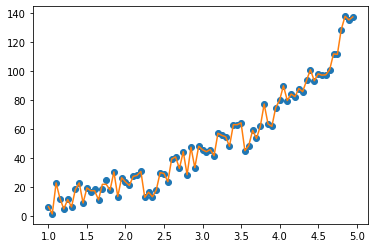

In [22]:
import numpy as np

x = np.array(np.arange(1, 5, 0.05))
ruido = np.random.rand(len(x)) * 25

y = x * x * x + ruido

plt.plot(x, y, 'o')

profundidade = 10
reg1 = 1 # valor inicial é 1 - mean samples leaf
reg2 = 0 # valor inicial é 0 - pruning

dtr = DecisionTreeRegressor(max_depth = profundidade, min_samples_leaf = reg1, ccp_alpha = reg2)
dtr.fit(x.reshape(-1,1),y.reshape(-1,1))


plt.plot(x, dtr.predict(x.reshape(-1,1)));

## Abordagens para redução de viés:
 
1) Utilizar um modelo mais complexo.

2) Complexificar o modelo atual, a partir de seus hyperparametros ou relaxamento de pressupostos.

3) Reduzir ou eliminar a regularização.

4) Melhor tratamento das features utilizadas.

5) Adição ou construção de novas features com capacidade preditiva.

6) Uso de ensembles voltados a redução de viés (como boosting ou stacking).

## Abordagens para redução de variância:

1) Utilizar um modelo mais simples.

2) Regularizar o modelo utilizado.

3) Diminuir a quantidade de features utilizadas.

4) Tratar o ruido das variaveis de entrada.

5) Uso de ensembles voltados para redução de variância (como bagging).

## Exemplos interessantes na relação viés/variância:
 
Podem tanto aumentar viés e variância, quanto reduzir os dois ao mesmo tempo.

1) Construção de novas features.

2) Segmentação do problema.

#  Exemplo: Case Data Masters

##  Escolha a partir das caracteristicas do projeto
    
- Variaveis estarem anonimizadas restringem interpretabilidade.

- Pelo pouco tempo disponivel, preferencia por modelos de alta performance com menor necessidade de tratamento ou construção de variáveis.

- Modelos com treino/teste rápido para revalidações e sua otimização dentro do prazo

- Modelos que sejam escalaveis para maior quantidade de dados, imaginando que esse seria um modelo para aplicar em uma base grande de clientes

## Escolhido : Random Forest

- Complexidade computacional baixa para treino (ou seja, roda rapido para treinar em grandes conjuntos de dados) e opção de paralização para treino/otimização

- Não é sensivel a outliers

- É invariante em relação a escala das variáveis

- Detecta interações entra variaveis e lida bem com relações não lineares

- Alta performance

- Rapidez de scoragem dos dados

- Escalavel para grande quantidade de dados

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import train_test_split

from sklearn.model_selection import learning_curve
from sklearn.model_selection import validation_curve

pandas_df = pd.read_csv('/kaggle/input/santander-customer-satisfaction/train.csv')
pandas_df.set_index('ID', inplace = True)
pandas_df = pandas_df.drop_duplicates()

X_train, X_test, y_train, y_test = train_test_split(pandas_df.drop(['TARGET'], axis = 1), pandas_df['TARGET'], test_size = 0.20, random_state = 42)

X_test_val = pd.read_csv('/kaggle/input/santander-customer-satisfaction/test.csv')
X_test_val.set_index('ID', inplace = True)



colunas_selecionadas = ['var15', 'imp_op_var41_efect_ult1', 'imp_op_var41_efect_ult3',
       'imp_op_var39_ult1', 'num_var4', 'num_var5', 'num_var30_0', 'num_var30',
       'saldo_var30', 'var36', 'num_var22_ult1', 'num_var22_ult3',
       'num_med_var22_ult3', 'num_meses_var5_ult3', 'num_var45_hace3',
       'num_var45_ult1', 'num_var45_ult3', 'saldo_medio_var5_hace2',
       'saldo_medio_var5_hace3', 'saldo_medio_var5_ult3', 'var38']

X_train_clean = X_train[colunas_selecionadas]

# Técnicas de Diagnóstico

 1) Validation Curves permitem analisar a influencia de um unico hyperparametro - geralmente o principal hyperparametro do algoritmo e mais significativo - no trade-off de viés/variancia, nos fornecendo uma noção baseline sobre sua performance.    
 
     - Exemplos de hyperparametros mais usados são Profundidade Máxima em Arvores de decisão, Numero de vizinhos em KNN, peso da Regularização Lasso ou Ridge em Modelos Lineares, peso do Hyperparametro C para regularização em SVMs, etc.

2) Learning Curves permitem analisar, ao fixar todos os hyperaparametros de um modelo, se suas estimativas sofrem de maior erro de viés e/ou variância.    

    - Nesse caso, todos os hyperparametros do modelo permanecem fixados e a variação progressiva ocorre na quantidade de observações utilizadas para treino e para teste.

3) Essas técnicas são utilizadas para considerar se o modelo escolhido aparenta ser um bom ponto de partida para resolução do problema, assim como dar orientação sobre os caminhos para melhoras do modelo.4) Validation Curves são, em geral, realizadas antes de Learning Curves para que a informação de performance fornecida sobre o hyperparametro principal seja utilizado nas Learning Curves. 

### Validation Curve (Random Forest) - Max Depth


In [35]:
param_range = np.arange(1, 30)
param_range

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29])

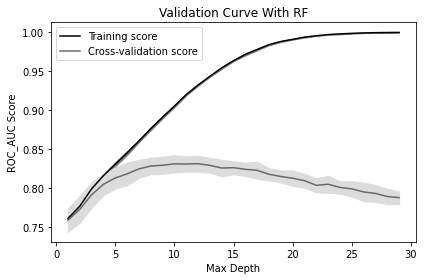

CPU times: user 2.31 s, sys: 537 ms, total: 2.85 s
Wall time: 8min 17s


In [36]:
%%time

train_scores, test_scores = validation_curve(RandomForestClassifier(), 
                                             X_train_clean, 
                                             y_train, 
                                             param_name = "max_depth", 
                                             param_range = param_range,
                                             cv = 7, 
                                             scoring = "roc_auc", 
                                             n_jobs = -1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With RF")
plt.xlabel("Max Depth")
plt.ylabel("ROC_AUC Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

 1) Na Validation Curve da Random Forest acima é possivel observar o comportamento das curvas de performance no treino e no teste, conforme aumentamos a complexidade do modelo.
 
 2) No lado esquerdo do gráfico, é onde se encontra a Random Forest mais simples entre os valores buscados e no lado direito, a Random Forest mais complexa.
 
- Podemos observar que quando o modelo se encontra mais simples possivel no lado esquerdo, a performance no treino é a menor entre todos os valores e se encontra colada na performance do teste. Nesse ponto, o modelo tem baixa variancia e alto viés.

- Conforme complexificamos o modelo, a performance do treino cresce progressivamente, junto da performance do teste - o que significa que o viés do modelo vai diminuindo - porem, tambem cresce a separação na difereça de performance entre o treino e a do teste - indicando tambem um aumento de variância do modelo.

- A partir de um certo ponto, ao redor da profundidade 8, a performance do teste para de crescer - o que indica que não ocorre mais  diminuição do viés - porem a separação entre a performance no treino e no teste segue crescendo ao complexificarmos o modelo - indicando que a variancia continua crescendo.

- O ponto ótimo a ser escolhido é na região em que a performance no teste é a maior possivel - ou seja, quando o modelo alcança o ponto de menor viés - e a separação entre treino e teste é a menor - ou seja, tambem com baixa variância.

3) Esse ponto ótimo do gráfico é geralmente um bom baseline de referencia sobre a performance do modelo, mas não necessariamente o resultado final a ser utilizado, porque:

- Os resultados de performance obtidas no grafico são uma estimativa das performances reais, em que a zona cinza indica uma aproximação de intervalo de confiança; portanto existe incerteza associada a esse ponto ótimo.

- Existem outros hyperparametros dos modelos que podem ser variados, assim como técnicas que buscam reduzir a variância e o viés dos modelos .

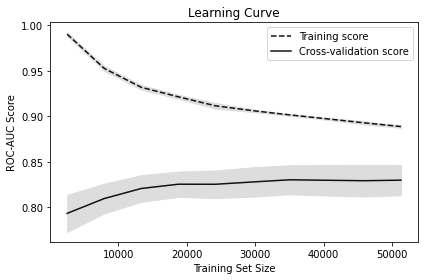

CPU times: user 1.23 s, sys: 224 ms, total: 1.45 s
Wall time: 1min 47s


In [37]:
%%time

# Create CV training and test scores for various training set sizes
train_sizes, train_scores, test_scores = learning_curve(RandomForestClassifier(max_depth = 9), 
                                                        X_train_clean, 
                                                        y_train,
                                                        # Number of folds in cross-validation
                                                        cv = 10,
                                                        # Evaluation metric
                                                        scoring = 'roc_auc',
                                                        # Use all computer cores
                                                        n_jobs = -1, 
                                                        # 50 different sizes of the training set
                                                        train_sizes = np.linspace(0.05, 1.0, 10))

# Create means and standard deviations of training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Create means and standard deviations of test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Draw lines
plt.plot(train_sizes, train_mean, '--', color="#111111",  label="Training score")
plt.plot(train_sizes, test_mean, color="#111111", label="Cross-validation score")

# Draw bands
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

# Create plot
plt.title("Learning Curve")
plt.xlabel("Training Set Size"), plt.ylabel("ROC-AUC Score"), plt.legend(loc="best")
plt.tight_layout()
plt.show()

# Learning Curves

1) São produzidas ao fixar um modelo e variar a quantidade de dados utilizados para treino.

2) Distancia entre performance de treino e o teste reflete o patamar de variância do modelo.

    - Modelos com muita variancia apresentam curvas bastante separadas, enquanto modelos com baixa variancia apresentam curvas muito próximas.

3) O ponto de convergência para onde a curva de performance entre treino e teste se direcionam reflete o nivel de viés do modelo.

    - Modelos com baixo viés convergem para um ponto de performance alto entre treino/teste, enquanto modelos com muito viés convergem para uma baixa performance.
    

- Dado a performance observa entre treino e teste nos modelos abaixo, o diagnostico inicial indica que a RF parece ser uma boa escolha de modelo baseline do qual seguir.


- O ponto de convergencia de performance da RF é ao redor de 85-86% de AUC, o que é uma métrica de partida bastante alta para um modelo de classificação e invariante em relação ao desbalanceamento do dataset.

- Dado que o ponto de convergencia parece satisfatório, o curso de ação mais adequado é pela redução da variância, de forma a fazer as duas curvas convergirem como prioridade.

- A validation curve indica um range ao redor de 6 a 11 como uma boa referencia de busca por melhor profundidade


As técnicas priorizadas serão as seguintes:

    - Regularização
    - Seleção de melhor combinação de features, diminuindo o numero utilizado agora
    - Oversampling
         
- Caso esse AUC for julgado ainda inadequado, outras abordagens seriam priorizadas para buscar aumentar o ponto de convergencia entre performance treino/teste

    Como: 
    
     - Feature Extraction
     - Construção e transformação de features
     - Analise de interações entre features e construções de variaveis voltadas para isso
     - Uso de ensembles
     - Relaxamento parcial nos filtros anteriores aplicados nas features, permitindo mais features serem escolhidas
     - Segmentação do problema
     - Uso de um modelo mais complexo/eficiente (talvez recorrendo a boosting)             


In [46]:
param_range = np.linspace(0.01, 10, 10)
param_range

array([ 0.01,  1.12,  2.23,  3.34,  4.45,  5.56,  6.67,  7.78,  8.89,
       10.  ])

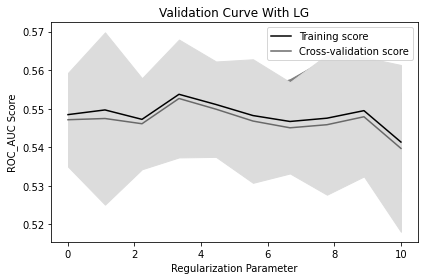

CPU times: user 955 ms, sys: 407 ms, total: 1.36 s
Wall time: 25.1 s


In [47]:
%%time

from sklearn.linear_model import LogisticRegression

train_scores, test_scores = validation_curve(LogisticRegression(max_iter = 200), 
                                             X_train_clean, 
                                             y_train, 
                                             param_name = "C", 
                                             param_range = param_range,
                                             cv = 5, 
                                             scoring = "roc_auc",  
                                             n_jobs = -1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With LG")
plt.xlabel("Regularization Parameter")
plt.ylabel("ROC_AUC Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

1) Tanto a performance do treino, quanto do teste, são bastante baixas, o que indica que o modelo é bastante enviesado (ou seja, a difereça entre os valores previstos pelo modelo e os valores reais das observaçõs é alta, em média).

2) A performance do treino sempre esta muito colada com a performance do teste, o que indica que o modelo tem baixissima variancia.

3) Existem diversos motivos possiveis sobre o porque esse comportamento se manteve por todo o gráfico, como:

Pressupostos do Modelo (Regressão Logistica) 

    a) Linearidade na relação com log-odds da target.  
    
    b) Desconsiderar interações entre variaveis e considerar contribuição independente de cada variavel.  
    
    c) Observações não serem geradas de forma independente.  
    
    d) Observações não serem identicamente distribuidas.
    
    - Variaveis estão em escalas diferentes e regularização L1/L2 não é invariante em relação a escala das variaveis.
    
    - Existencia de outliers muito extremos.

In [51]:
param_range = np.arange(1, 40, 2)
param_range

array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39])

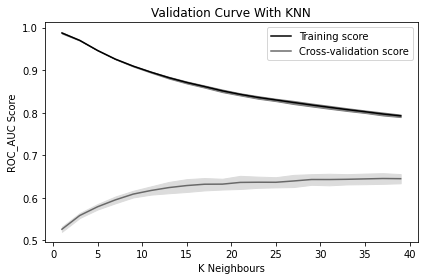

CPU times: user 1.52 s, sys: 463 ms, total: 1.99 s
Wall time: 31min 31s


In [52]:
%%time

train_scores, test_scores = validation_curve(KNeighborsClassifier(), 
                                             X_train_clean, 
                                             y_train, 
                                             param_name = "n_neighbors", 
                                             param_range = param_range,
                                             cv = 5, 
                                             scoring = "roc_auc",  
                                             n_jobs = -1)


# Calculate mean and standard deviation for training set scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)

# Calculate mean and standard deviation for test set scores
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot mean accuracy scores for training and test sets
plt.plot(param_range, train_mean, label="Training score", color="black")
plt.plot(param_range, test_mean, label="Cross-validation score", color="dimgrey")

# Plot accurancy bands for training and test sets
plt.fill_between(param_range, train_mean - train_std, train_mean + train_std, color="gray")
plt.fill_between(param_range, test_mean - test_std, test_mean + test_std, color="gainsboro")

# Create plot
plt.title("Validation Curve With KNN")
plt.xlabel("K Neighbours")
plt.ylabel("ROC_AUC Score")
plt.tight_layout()
plt.legend(loc="best")
plt.show()

1) A posição do "modelo simples" e "modelo complexo" é o inverso da posição observada no gráfico da Random Forest - nesse gráfico, o modelo "mais complexo" se encontra na esquerda e o modelo "mais simples" na direita.

2) Conforme a distancia entre a performance do treino e teste diminui, tanto a performance de treino quanto do teste ficam bastante abaixo das performances observadas no grafico da Random Forest - indicando que existe um erro consideravel de viés nesse modelo. 

3) Durante todos os valores utilizado para o K, se mantem uma distancia grande entre a performance de treino e a de teste - indicando tambem erro consideravel de variância.

Motivos diversos para os erros de viés e os de variância:  
        
        a) Escala das features.        
        b) Features que não contribuem para separabilidade tem mais peso em um KNN do que em Arvores de Decisão.          
        c) Geometria utilizada.   
        d) Outliers e amostras não representativas na zona de separação entre as classes.
        e) Uso de peso uniforme, em vez de ponderação pela distancia, como hyperparametro.
        f)  Observações não serem geradas de forma independente.          
        g) Observações não serem identicamente distribuidas.